# Optimisation des hyper paramètres

## Récapitulatif

+ Lire paris_airbnb_train.csv dans un Dataframe et l'assigner à la variable train_df.
+ Lire paris_airbnb_test.csv dans un Dataframe et l'assigner à la variable test_df.

In [29]:
import pandas as pd

train_df = pd.read_csv('paris_airbnb_train.csv')
test_df = pd.read_csv('paris_airbnb_test.csv')

## Optimisation hyper paramétrique

+ Créer une liste contenant les valeurs entières 1, 2, 3, 4, et 5, dans cet ordre et l'assigner à la variable hyper_params.
+ Créer une liste vide et l'assigner à la variable mse_values.
+ Utiliser une boucle for pour itérer sur toutes les valeurs de hyper_params et pour chaque itération:
 - Instancier un objet de la classe KNeighborsRegressor avec les paramètres suivants: n_neighbors: la valeur correspondante à la variable itérative et algorithm: brute  
 - Adapter le modèle des k plus proches voisins  aux colonnes suivantes de train_df: 'accommodates', 'bedrooms', 'bathrooms' et 'number_of_reviews'
 - Utiliser le modèle entrainé pour faire des prédictions sur les mêmes colonnes de test_df et assigner le résultat à la variable predictions.
 - Utiliser la fonction mean_squared_error pour calculer la valeur de MSE entre le tableau Numpy predictions et la colonne price de test_df.
 - Ajouter la valeur MSE à la liste mse_values.
+ Afficher le résultat mse_values qui contient toutes les valeurs de MSE.


In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [1, 2, 3, 4, 5]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    
print(mse_values)

[9817.323943661971, 7002.631324986959, 5907.894742943257, 5661.341223265519, 5417.664287949922]


## Elargir la grille de recherche

+ Changer la liste des valeurs des hyper paramètres, hyper_params, donc cela ira de 1 à 60.
+ Créer une liste vide et assigner la à la variable  mse_values.
+ Utiliser une boucle for pour itérer à travers hyper_params et pour chaque itération:
 - Instancier un objet de la classe KNeighborsRegressor avec les paramètres suivants: n_neighbors: la valeur de la variable itérative actuelle et algorithm: brute
 - Adapter le modèle des k plus proches voisins aux colonnes suivantes du dataframe train_df:accommodates, bedrooms, bathrooms et number_of_reviews
 - Utiliser le modèle entrainé pour faire des prédictions sur les mêmes colonnes de test_df et assigner les résultatrs à la variable predictions.
 - Utiliser la fonction mean_squared_error pour calculer la valeur de MSE entre le tableau Numpy predictions et la colonne price de test_df.
 - Ajouter la valeur de MSE à la liste mse_values.
+ Afficher le résultat mse_values.

In [31]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [x for x in range(1,60)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    
print(mse_values)

[9817.323943661971, 7002.631324986959, 5907.894742943257, 5661.341223265519, 5417.664287949922, 5418.813481713325, 5247.059659544569, 5170.334042449139, 6528.348486897609, 6202.626953573291, 5965.656544100846, 5873.992349156668, 5751.721544696626, 5623.250013307358, 5531.67691879673, 5434.749519105373, 5390.129792983197, 5362.932261378053, 5267.722446921191, 5244.954955659886, 5236.744736496582, 5204.820291045323, 5224.870032630144, 5167.27829127543, 5138.799817214398, 5070.933075441472, 5053.942998641138, 5058.67444481705, 5033.274029786682, 4993.322969338666, 4999.006861766428, 4972.459228388269, 4960.304749970421, 4930.386004028786, 4942.974229291091, 4933.838639173864, 4951.927382273785, 4959.470553236315, 4941.431895044752, 4930.557633346374, 4919.229180534106, 4920.038364519864, 4888.856479541874, 4881.809930827697, 4878.09661417982, 4867.586865307226, 4878.6290923955285, 4880.843236728757, 4875.086292943929, 4883.599426604069, 4888.731776249937, 4869.749983794946, 4858.346301189

In [32]:
print(min(mse_values))

4848.211829106493


## Visualiser les valeurs des hyper paramètres

+ Utiliser la méthode scatter() de la bibliothèque matplotlib.pyplot pour générer un graphique avec:
 - hyper_params sur l'axe x,
 - mse_values sur l'axe y.
+ Utiliser plt.show() pour l'afficher.

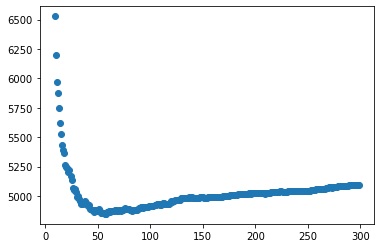

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [x for x in range(9,300)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    
plt.scatter(hyper_params, mse_values)

## Varier les caractéristiques et les hyper paramètres

+ Faire varier k de 1 à 100...
+ Utiliser une boucle for pour itérer à travers hyper_params et pour chaque itération:
 - Instancier un objet de la classe KNeighborsRegressor avec les mêmes paramètres
 - Adapter le modèle à toutes les colonnes, excepté la colonne 'price', de train_df
 - Utiliser le modèle entrainé pour faire des prédictions sur les mêmes colonnes de test_df et assigner les résultats à predictions.
 - Utiliser la fonction mean_squared_error pour calculer la valeur MSE entre le tableau predictions et la colonne price de test_df.
 - Ajouter la valeur MSE à la liste mse_values.
+ Utiliser la méthode scatter() de matplotlib.pyplot pour générer un graphique:
 - hyper_params sur l'axe x,
+ Utiliser plt.show() pour l'afficher.

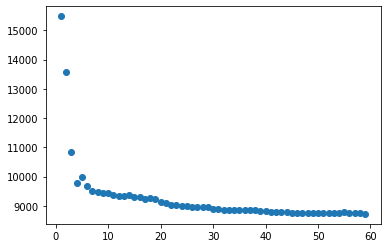

In [33]:
hyper_param = [x for x in range(1,100)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    
plt.scatter(hyper_params, mse_values)
plt.show()

In [34]:
print(min(mse_values))

8725.804287737126


## Pratiquer le workflow

+ En utilisant uniquement les colonnes 'accommodates' et 'bathrooms':
 - Entrainer un modèle pour chaque valeur de k entre 1 et 100 en utilisant les données d'apprentissage.
 - Utiliser chaque modèle pour faire des prédictions sur le set de test (en utilisant seulement les colonnes 'accommodates' et 'bathrooms').
 - Calculer la valeur MSE de chaque modèle en comparant chaque set de prédictions aux valeurs réelles de prix.
 - Trouver la valeur k ayant obtenu la valeur MSE la plus faible.
 - Créer un dictionnaire nommé two_hp_mse qui contient une paire clé / valeur. 'clé' est la valeur de k ayant entrainé la plus faible valeur MSE et 'valeur' est la valeur MSE correspondante
+ Répéter cette procédure en utilisant uniquement les colonnes 'accommodates', 'bathrooms' et 'bedrooms':
 - Créer un dictionnaire nommé three_hp_mse qui contient une paire clé / valeur. 'clé' est la valeur de k ayant entrainé la plus faible valeur MSE et 'valeur' est la valeur MSE correspondante
+ Afficher les résultats two_hp_mse et three_hp_mse.

In [36]:
# for k, mse in enumerate(two_mse_values):

In [37]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,100)]

two_mse_values = list()
three_mse_values = list()

two_hp_mse = dict()
three_hp_mse = dict()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)
    
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
    

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)
    
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1

two_hp_mse[two_lowest_k] = two_lowest_mse
three_hp_mse[three_lowest_k] = three_lowest_mse

print(two_hp_mse)
print(three_hp_mse)

{94: 4948.546816114567}
{90: 4902.640327672482}
